# a/b test sample project

## Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading the Data into a DataFrame

In [4]:
# write the code for reading the dataset abtest.csv
fld= "C:/Users/kbilg/PGP-DSBA/businessStatistics/week3_project/"
df_abtest  = pd.read_csv(fld+'abtest.csv') # Import the dataset


,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish
5,546558,control,old,5.28,yes,English
6,546448,treatment,new,5.25,yes,French
7,546581,control,old,6.53,yes,Spanish
8,546461,treatment,new,10.71,yes,French
9,546548,control,old,2.08,no,English


### Data Overview
- View a few rows of the data frame.
- Check the shape and data types of the data frame. Add observations.
- Fix the data-types (if needed).
- Missing Value Check.
- Summary statistics from the data frame. Add observations.

In [5]:
df_abtest.head(10)

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish
5,546558,control,old,5.28,yes,English
6,546448,treatment,new,5.25,yes,French
7,546581,control,old,6.53,yes,Spanish
8,546461,treatment,new,10.71,yes,French
9,546548,control,old,2.08,no,English


In [7]:
df_abtest.shape

(100, 6)

In [13]:
df_abtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [24]:
df_abtest['group'] = df_abtest.group.astype('category')
df_abtest['landing_page'] = df_abtest.landing_page.astype('category')
df_abtest['converted'] = df_abtest.converted.astype('category')
df_abtest['language_preferred'] = df_abtest.language_preferred.astype('category')
df_abtest['user_id']=df_abtest.user_id.astype(str)

df_abtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    object  
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(4), float64(1), object(1)
memory usage: 2.6+ KB


In [27]:
df_abtest['user_id'].nunique()

100

### Observations
* There are 100 rows, each row represent a unique user and 6 columns in the data which includes information about A/B test results. 
* There are no missing values in any field. 
* In order to decrease the memory usage data-types are fixed.

In [32]:
df_abtest.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100,100,546592,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
group,100,2,control,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,100,2,new,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,100.0,NaN,NaN,NaN,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71
converted,100,2,yes,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,100,3,French,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
df_abtest['language_preferred'].value_counts()

French     34
Spanish    34
English    32
Name: language_preferred, dtype: int64

### Observations
* There are 100 unique users which are selected as a sample group, 
* There are 2 groups, 50 of the users are in the control group, other 50 of them are in the treatment group.
* There are 2 landing page categories which are 'new' and 'old'.
* The mean time spent on the page is ~5.4 minutes overall with minimum 0.19 and maximum 10.71 minutes.
* 54 users are converted as new subscribers.
* There are 3 unique preferred languages whic are French, Spanish, English. The most preffered languages are French and Spanish, 34 users were preferred it.

### Univariate Analysis

In [30]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [31]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()      # height of the plot

        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")  # annotate the percentage

    plt.show()  # show the plot

Mean time spent (minutes): 5.38 ; Median time spent (minutes): 5.42


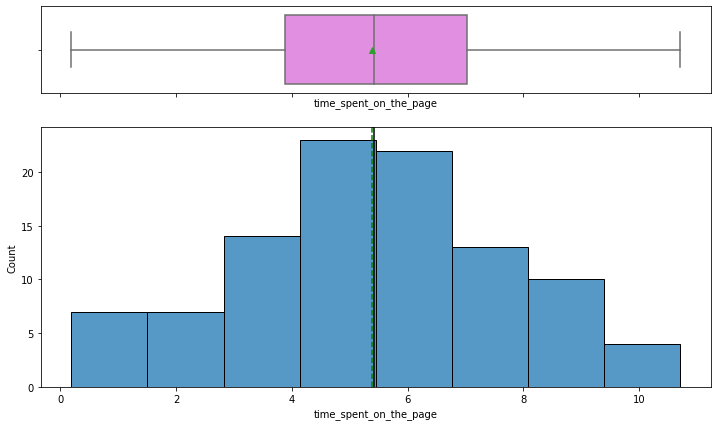

In [78]:
histogram_boxplot(df_abtest,"time_spent_on_the_page")
print('Mean time spent (minutes):', round(df_abtest['time_spent_on_the_page'].mean(),2),'; '
     'Median time spent (minutes):', round(df_abtest['time_spent_on_the_page'].median(),2))

### Observations
* Normal distribution, non-linear
* Time spent on the page does not have any outliers overall.
* The distribution of time spent has one peak at around 5.5.

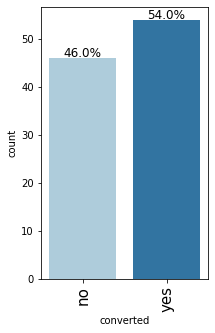

In [79]:
labeled_barplot(df_abtest,'converted',perc = True)

### Observations
* 54% of the users are converted within the sample of 100 users.

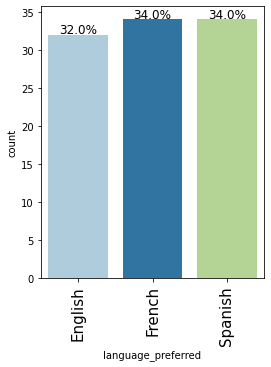

In [80]:
labeled_barplot(df_abtest,'language_preferred',perc = True)

### Observations
* Language preference is almost equily distributed. 

### Bivariate Analysis

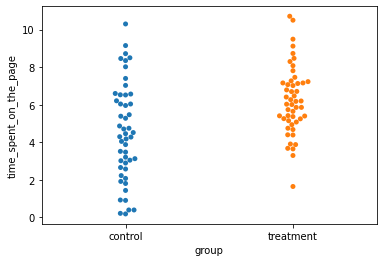

In [43]:
sns.swarmplot(data = df_abtest, x = 'group', y='time_spent_on_the_page');

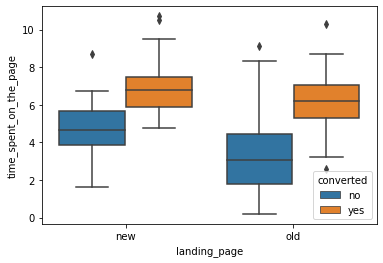

In [156]:
sns.boxplot(data = df_abtest, x ='landing_page', y ='time_spent_on_the_page',hue='converted');

### Observations
* Converted users are highly likey to spend more time on the page.
* The mean time spent on the new landing page is higher than on the old langing page.

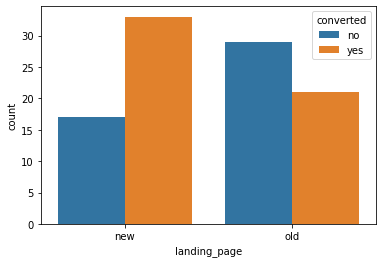

In [157]:
sns.countplot(data = df_abtest, x='landing_page',hue=df_abtest['converted']);

### Observations
* There are more converted users on the new langing page.

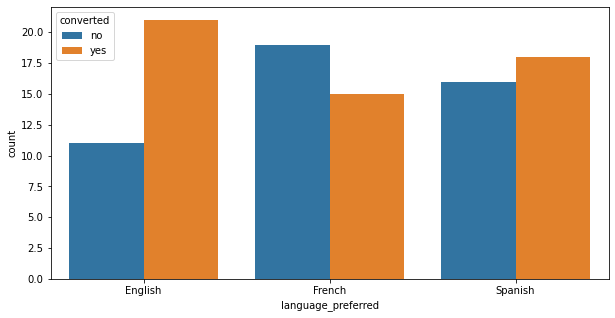

In [65]:
plt.figure(figsize=(10,5))
sns.countplot(data = df_abtest, x='language_preferred',hue=df_abtest['converted']);

### Observations
* The most converted users prefers English as a language.

## 2. Do the users spend more time on the new landing page than the existing landing page? (10 Marks)

### Perform Visual Analysis

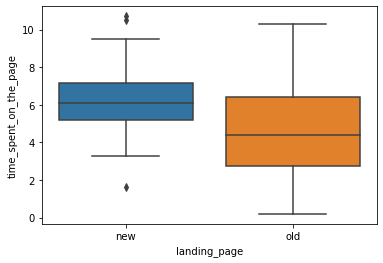

In [48]:
sns.boxplot(data = df_abtest, x ='landing_page', y ='time_spent_on_the_page');

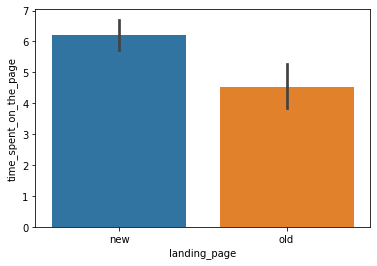

In [94]:
sns.barplot(data = df_abtest, y='time_spent_on_the_page',x='landing_page');

Users more likely to spent time on new landing page according to sample data. Let`s test if we can assume that it is also the case for the population. 

### Step 1: Define the null and alternate hypotheses

Let $\mu_1, \mu_2$ be the mean time spent on the **New** and **Old** landing pages respectively.

We will test the null hypothesis

>$H_0:\mu_1=\mu_2$

against the alternate hypothesis

>$H_a:\mu_1>\mu_2$

### Step 2: Select Appropriate test

**Two Independent Sample T-test for Equality of Means - Unequal Std Dev**
* Continuous data - Yes, the time data is on a continuous scale.
* Normally distributed populations - Yes.
* Independent populations - As we are taking random samples for two different groups, the two samples are from two independent populations.
* Unequal population standard deviations - As the sample standard deviations are different, the population standard deviations may be assumed to be different.
* Random sampling from the population - Yes, we are informed that the collected sample a simple random sample.

We can use two sample T-test for this problem.

### Step 3: Decide the significance level

Significance level = 0.05

### Step 4: Collect and prepare data

In [90]:
# create subsetted data frame for new landing page users 
time_spent_new = df_abtest[df_abtest['landing_page'] == 'new']['time_spent_on_the_page']
# create subsetted data frame for old landing page users
time_spent_old = df_abtest[df_abtest['landing_page'] == 'old']['time_spent_on_the_page']

print('The sample standard deviation of the time spent of the new page is:', round(time_spent_new.std(),2))
print('The sample standard deviation of the time spent of the old page is:', round(time_spent_old.std(),2))
print('The sample mean of the time spent of the new page is:', round(time_spent_new.mean(),2))
print('The sample mean of the time spent of the old page is:', round(time_spent_old.mean(),2))

The sample standard deviation of the time spent of the new page is: 1.82
The sample standard deviation of the time spent of the old page is: 2.58
The sample mean of the time spent of the new page is: 6.22
The sample mean of the time spent of the old page is: 4.53


### Step 5: Calculate the p-value

In [93]:
from scipy.stats import ttest_ind

test_stat, p_value = ttest_ind(time_spent_new, time_spent_old, equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

p_value is 0.0001 which is smaller than accepted significance level of 0.05.

### Step 7:  Draw inference

As the p-value (~0.0001) is less than the level of significance, we can reject the null hypothesis. Hence, we do have enough evidence to support that the mean time spent on new landing page has higher than the mean time spent on old landing page.

**A similar approach can be followed to answer the other questions.**

## 3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page? (10 Marks)

### Visual Analysis

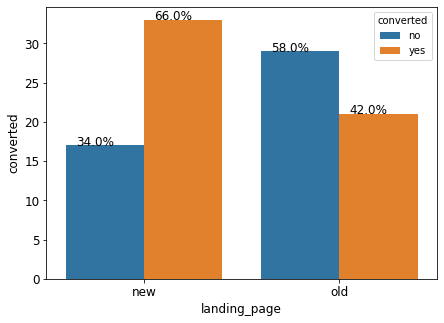

In [112]:
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()
    
plt.figure(figsize=(7,5))
ax= sns.countplot(data = df_abtest, x='landing_page',hue=df_abtest['converted'])
plt.xticks(size=12)
plt.xlabel('landing_page', size=12)
plt.yticks(size=12)
plt.ylabel('converted', size=12)

with_hue(ax, df_abtest.landing_page,2,2)

### Step 1: The null and alternate hypotheses

Let $p_1,p_2$ be the proportions of conversion rates for new and old landing pages respectively.

The null hypothesis;

>$H_0:p_1 =p_2$

against the alternate hypothesis

>$H_a:p_1 > p_2$

### Step 2: Selected test
Two Proportion Z-test is selected to test the hypothesis.

* Binomally distributed population - Yes, a user is either converted or not converted.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.  
* Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10.

### Step 3: The significance level

Significance level = 0.05

### Step 4: Data

In [127]:
# create subsetted data frame for new landing page users 
converted_new = df_abtest[df_abtest['landing_page'] == 'new']['converted'].value_counts()['yes']
# create subsetted data frame for old landing page users
converted_old=df_abtest[df_abtest['landing_page'] == 'old']['converted'].value_counts()['yes']

### Step 5: The p-value

In [130]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

converted_count = np.array([converted_new, converted_old])
sample_count = np.array([df_abtest['landing_page'].value_counts()['new'],df_abtest['landing_page'].value_counts()['old']])

# find the p-value
test_stat, p_value = proportions_ztest(converted_count, sample_count, value = 0, alternative = 'larger')
print('The p-value is ' + str(p_value))

The p-value is 0.008026308204056278


### Insights
As the p-value is smaller (~0,008) than the significance level 0.05, we can reject the null hypothesis. Thus, the conversion rate on new landing page is higher than conversion rate on old landing page.

## 4. Is the conversion and preferred language are independent or related? (10 Marks)

### Visual Analysis

### Step 1: The null and alternate hypotheses

We will test the null hypothesis

>$H_0:$ Conversion is independent of preffered language.

against the alternate hypothesis

>$H_a:$ Conversion depends on preffered language.

### Step 2: Selected test
Chi-Square Test for Independence is selected to test the hypothesis.

* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

### Step 3: The significance level

Significance level = 0.05

### Step 4: Data

In [139]:
contingency_table = pd.crosstab(df_abtest['converted'],df_abtest['language_preferred'],margins=True, margins_name="Total")  

contingency_table

language_preferred,English,French,Spanish,Total
converted,,,,
no,11,19,16,46
yes,21,15,18,54
Total,32,34,34,100


### Step 5: The p-value

In [140]:
# import the required function
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(contingency_table)
print('The p-value is', p_value)

The p-value is 0.7970832186581233


### Insights
As the p-value is more (~0,8) than the significance level, we can not reject the null hypothesis. Hence, we do not have enough statistical significance to conclude that conversion depends of preferred language at 5% significance level.

## 5. Is the time spent on the new page same for the different language users? (10 Marks)

### Visual Analysis

language_preferred
English    5.559062
French     5.253235
Spanish    5.331765
Name: time_spent_on_the_page, dtype: float64


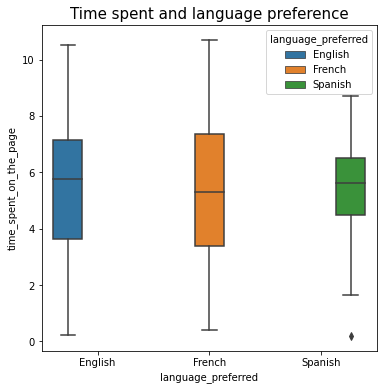

In [143]:
# mean of carbon emission at different levels of the fuel_type factor
print(df_abtest.groupby("language_preferred")["time_spent_on_the_page"].mean())

# draw the boxplot for visualization 
fig, ax = plt.subplots(figsize = (6,6))
a = sns.boxplot(x= "language_preferred", y = 'time_spent_on_the_page' , data = df_abtest, hue = 'language_preferred')
a.set_title("Time spent and language preference", fontsize=15)
plt.show()

### Step 1: The null and alternate hypotheses

Let $\mu_1, \mu_2, \mu_3$ be the means of time spents for English, Spanish, French language selections respectively.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least one the time spent on the new page same for the different language users is different from the rest.

### Step 2: Selected test

One-way ANOVA test is selected.

### Step 3: The significance level

Significance level = 0.05

Now, the normality and equality of variance assumptions need to be checked. 

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

#### Shapiro-Wilk’s test 

We will test the null hypothesis

>$H_0:$ Time spent on the new page follows a normal distribution

against the alternative hypothesis

>$H_a:$ Time spent on the new page does not follow a normal distribution

In [150]:
# Assumption 1: Normality
# import the required function
from scipy.stats import shapiro

df_abtest_new = df_abtest[df_abtest['landing_page'] == 'new']
# find the p-value
w, p_value = shapiro(df_abtest_new['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Since p-value of the test is very large, we fail to reject the null hypothesis that the response follows the normal distribution.

#### Levene test 
We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [153]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( df_abtest_new[df_abtest_new['language_preferred']=="English"]['time_spent_on_the_page'], 
                             df_abtest_new[df_abtest_new['language_preferred']=="French"]['time_spent_on_the_page'], 
                             df_abtest_new[df_abtest_new['language_preferred']=="Spanish"]['time_spent_on_the_page'])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


The p-value is large than the 5% significance level, we fail to reject the null hypothesis of homogeneity of variances.

### Step 4: Data

In [151]:
# the time spent on the new page by English, French and Spanish language
time_spent_english = df_abtest_new[df_abtest_new['language_preferred']=="English"]['time_spent_on_the_page']
time_spent_french = df_abtest_new[df_abtest_new['language_preferred']=="French"]['time_spent_on_the_page']
time_spent_spanish =  df_abtest_new[df_abtest_new['language_preferred']=="Spanish"]['time_spent_on_the_page']

### Step 5: The p-value

In [154]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(time_spent_english,
                              time_spent_french,
                              time_spent_spanish)
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


### Insights

As the p-value is higher than the significance level, we can not reject the null hypothesis. Hence, we do not have enough statistical significance to conclude that  at least one the time spent on the new page same for the different language users is different from the rest at 5% significance level.

## Conclusion and Business Recommendations

### Conclusion

We analyzed a sample dataset of 100 users in splitted equally in 2 groups as treatment and control groups to find out if new landing page is more efective to gather new subscribers.
The main feature of interest here is the number of converted users. 

We have been able to conclude that 

1. The mean time spent on new landing page is higher than on old landing page.
2. Conversion rate is greater in the new landing page.
3. Conversion status is independent from different preferred language users.
4. The mean time spent on the new page is same for different language users.


### Recommendation to business

The new landing page is more efective according to test results based on sample data so the company can go live with new landing page. Both the mean conversion rate and time spent on the page is higher on the new landing page which approves that the new design is more successful. 